# Secure and Private AI : Part 4 - Classifying Fashion-MNIST (Solution)

source : https://classroom.udacity.com/courses/ud185/lessons/8a993162-65c4-4a80-bd35-47d9f3a6f5bc/concepts/70526adf-40d3-4446-ac32-d3f798739745

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

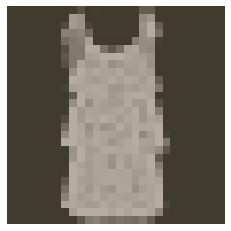

In [2]:
# see one of the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
# building the network

from torch import nn, optim
import torch.nn.functional as F

In [4]:
# define the network architecture 
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        #make sure the input tensor is flattened
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Train the network

1. First you'll want to define the criterion (something like nn. or nn.NLLLoss) 
2. and the optimizer (typically optim.SGD or optim.Adam).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4

In [6]:
# create the network, define the criterion and optimizer

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

## Try to predict the clothes without training


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out our network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

## Now, train the model and increase the quality of the predictions!

In [8]:
# train the model
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"training loss: {running_loss}")

training loss: 489.07935957610607
training loss: 365.2417050972581
training loss: 335.35467436909676
training loss: 312.6761027649045
training loss: 295.91014794260263


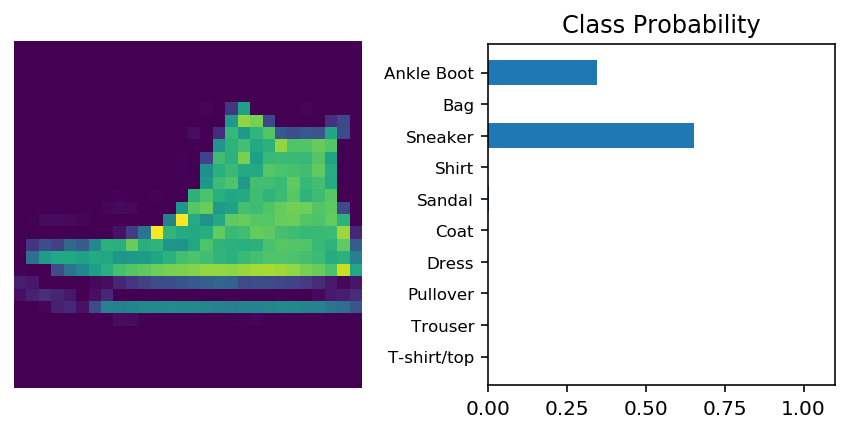

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out our network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')